### Clasificación basada en arboles / Proyecto 2-Parte I (Core)

## Proyecto 2-Parte I (Core)

**Proyecto 2: Análisis Inicial y Selección de Problema**

Objetivo: Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

# **insurance.csv**

El dataset contiene información de personas y los costos asociados a sus gastos médicos en los Estados Unidos. Es utilizado en estudios de seguros médicos, análisis estadísticos y modelos de predicción relacionados con salud y economía.  

| **Columna**     | **Descripción**                                                                                       |
|------------------|-------------------------------------------------------------------------------------------------------|
| **age**         | Edad de la persona en años. Ejemplo: `19`, `18`, `28`.                                               |
| **sex**         | Género de la persona: `male` (hombre) o `female` (mujer).                                             |
| **bmi**         | Índice de Masa Corporal, una medida del peso en relación con la altura. Ejemplo: `27.9`, `33.77`.     |
| **children**    | Número de hijos o dependientes a cargo de la persona. Ejemplo: `0`, `1`, `3`.                         |
| **smoker**      | Si la persona es fumadora: `yes` (fumador) o `no` (no fumador).                                       |
| **region**      | Región de residencia en los Estados Unidos: `southwest`, `southeast`, `northwest`, o `northeast`.     |
| **charges**     | Costos médicos estimados para la persona, expresados en dólares. Ejemplo: `16884.924`, `1725.5523`.   |

## Ejemplo de Registros

| **age** | **sex**   | **bmi** | **children** | **smoker** | **region**   | **charges**  |
|---------|-----------|---------|--------------|------------|--------------|--------------|
| 19      | female    | 27.9    | 0            | yes        | southwest    | 16884.924    |
| 18      | male      | 33.77   | 1            | no         | southeast    | 1725.5523    |
| 28      | male      | 33      | 3            | no         | southeast    | 4449.462     |

Este diseño es ideal para incluir en documentación educativa o explicativa para un análisis de datos detallado. 😊


## Inspección inicial del dataset

# **Inspección Inicial del Dataset: insurance.csv**

El dataset contiene información sobre personas y sus costos médicos, que incluye variables demográficas, características físicas y hábitos relacionados con la salud. A continuación, se presenta un análisis inicial de su estructura y contenido:

## **1. Dimensiones del Dataset**
- **Número de filas (registros):** 1338  
- **Número de columnas (atributos):** 7  

## **2. Tipos de Datos**
| **Columna**   | **Tipo de dato** | **Ejemplo**        |
|---------------|------------------|--------------------|
| `age`         | Entero (`int64`) | 19, 18, 28         |
| `sex`         | Texto (`object`) | male, female       |
| `bmi`         | Decimal (`float64`) | 27.9, 33.77, 33 |
| `children`    | Entero (`int64`) | 0, 1, 3            |
| `smoker`      | Texto (`object`) | yes, no            |
| `region`      | Texto (`object`) | southwest, southeast |
| `charges`     | Decimal (`float64`) | 16884.924, 1725.5523 |

## **3. Información General del Dataset**
- **Valores nulos:** No se encontraron valores nulos en ninguna columna.  
- **Tamaño en memoria:** Aproximadamente 73.5 KB.  
- **Distribución preliminar:**  
  - Las edades varían entre **18 y 64 años**.  
  - Los valores de `bmi` oscilan entre **15.96 y 53.13**, lo que indica una variedad de condiciones físicas.  
  - Hay **categorías balanceadas** en la variable `sex`.  
  - `charges` muestra una amplia variación, lo que puede indicar diferencias en los costos según las características personales.

## **4. Exploración Preliminar**
- **Valores únicos:**  
  - `sex`: `male`, `female`.  
  - `region`: `southwest`, `southeast`, `northwest`, `northeast`.  
  - `smoker`: `yes`, `no`.  

- **Distribución de `children`:**  
  - La mayoría de los registros tienen entre 0 y 3 hijos.  

- **Distribución de `charges`:**  
  - Promedio: **13270.42 USD**.  
  - Mínimo: **1121.87 USD**.  
  - Máximo: **63770.43 USD**.

## **5. Posibles Problemas**
- **Outliers en `charges`:** Algunos costos son significativamente más altos que el promedio.  
- **Distribución de `bmi`:** Podría contener valores extremos.  
- **Relación entre variables:** Se requiere un análisis más profundo para identificar correlaciones entre `smoker`, `region` y `charges`.

Esta inspección inicial proporciona una visión general que sirve de base para el análisis exploratorio de datos (EDA).


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [2]:
path = '../datasets/insurance.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   fumador   1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.head()

,age,sex,bmi,children,fumador,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Verificar estadísticas descriptivas para columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
age,1338,0,0.0
sex,1338,0,0.0
bmi,1338,0,0.0
children,1338,0,0.0
fumador,1338,0,0.0
region,1338,0,0.0
charges,1338,0,0.0


In [6]:
# Verificar valores duplicados
duplicados = df.duplicated()

# Contar el total de duplicados
total_duplicados = duplicados.sum()
print(f"Total de filas duplicadas: {total_duplicados}")


Total de filas duplicadas: 1


In [7]:
# Eliminar duplicados en todas las columnas
df = df.drop_duplicates()

In [8]:
# Verificar valores duplicados
duplicados = df.duplicated()

# Contar el total de duplicados
total_duplicados = duplicados.sum()
print(f"Total de filas duplicadas: {total_duplicados}")

Total de filas duplicadas: 0


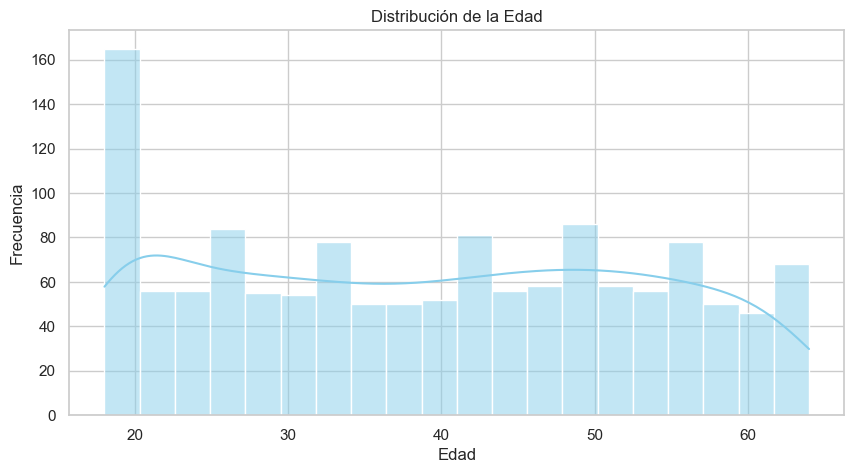

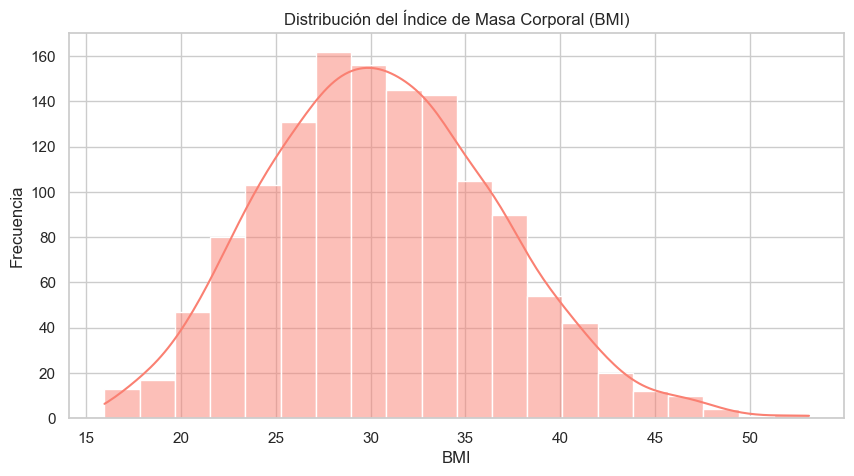

C:\Users\user\AppData\Local\Temp\ipykernel_7464\123404020.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fumador', palette='pastel')


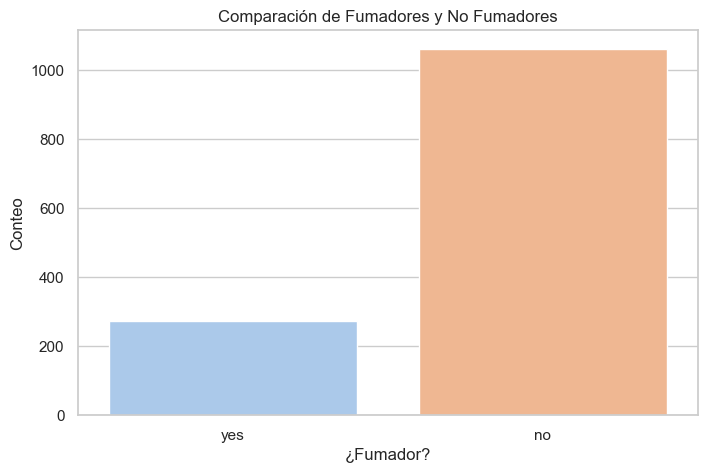

In [9]:
# Importar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización inicial de distribuciones
sns.set(style="whitegrid")

# Distribución de la edad
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de BMI
plt.figure(figsize=(10, 5))
sns.histplot(df['bmi'], bins=20, kde=True, color='salmon')
plt.title("Distribución del Índice de Masa Corporal (BMI)")
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.show()

# Comparación de fumadores vs no fumadores
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='fumador', palette='pastel')
plt.title("Comparación de Fumadores y No Fumadores")
plt.xlabel("¿Fumador?")
plt.ylabel("Conteo")
plt.show()


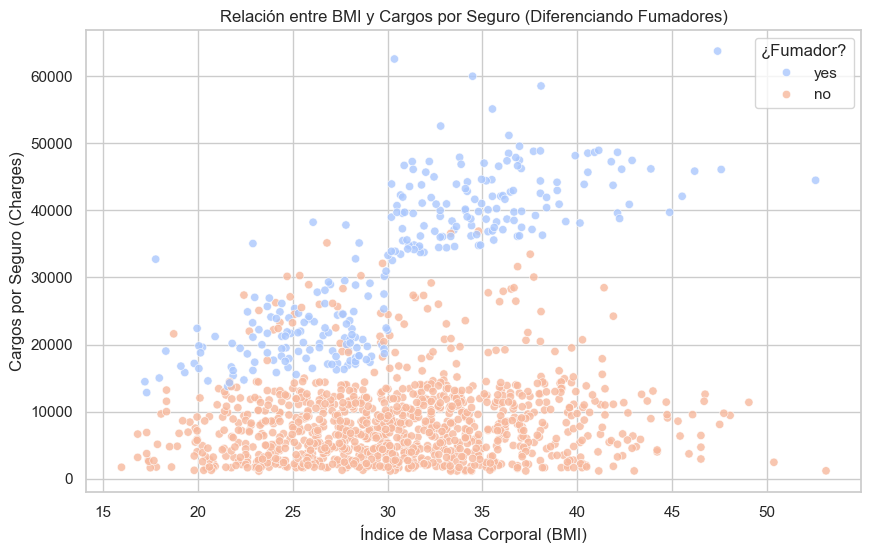

In [10]:
# Gráfico de dispersión entre BMI y charges, diferenciando fumadores y no fumadores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='fumador', palette='coolwarm', alpha=0.8)
plt.title("Relación entre BMI y Cargos por Seguro (Diferenciando Fumadores)")
plt.xlabel("Índice de Masa Corporal (BMI)")
plt.ylabel("Cargos por Seguro (Charges)")
plt.legend(title="¿Fumador?")
plt.grid(True)
plt.show()


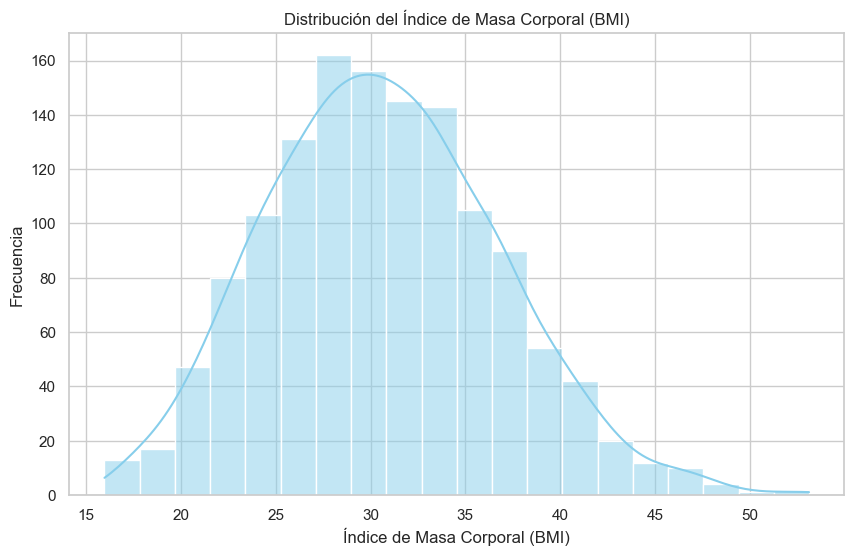

In [11]:
# Histograma de BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], bins=20, kde=True, color='skyblue')
plt.title("Distribución del Índice de Masa Corporal (BMI)")
plt.xlabel("Índice de Masa Corporal (BMI)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


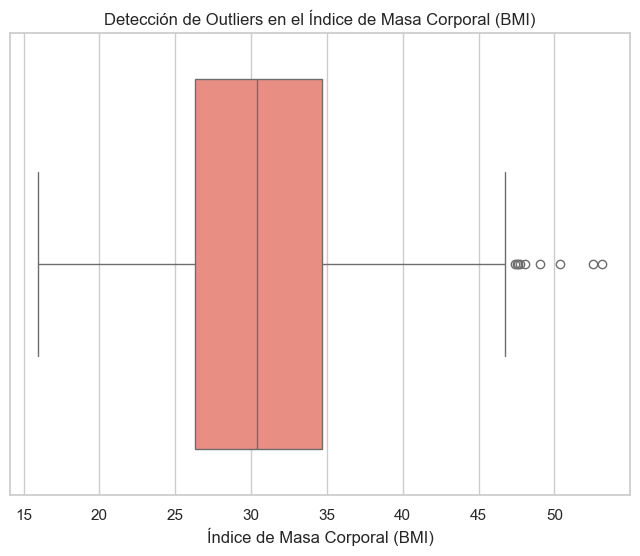

In [12]:
# Boxplot para detectar outliers en BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'], color='salmon')
plt.title("Detección de Outliers en el Índice de Masa Corporal (BMI)")
plt.xlabel("Índice de Masa Corporal (BMI)")
plt.show()


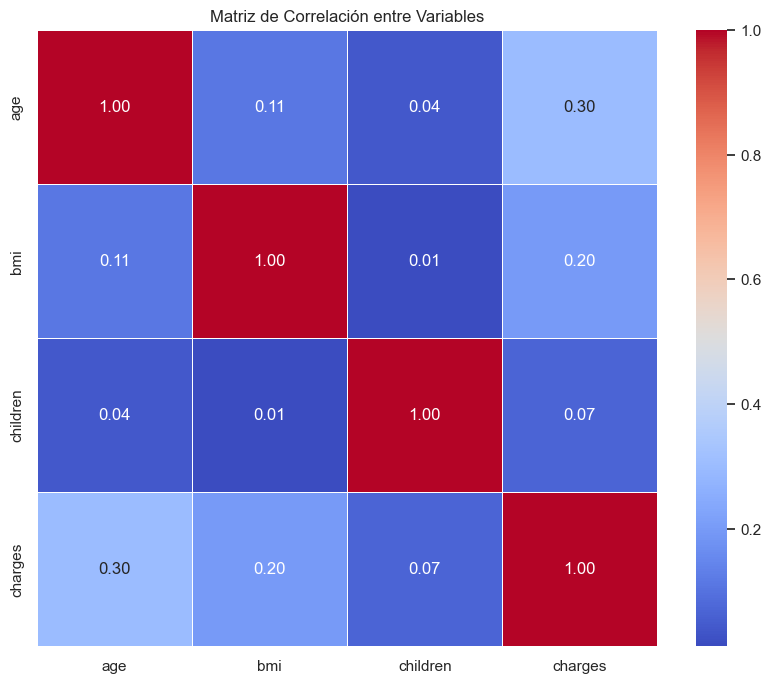

In [13]:
# Filtrar las columnas numéricas de df
df_numerical = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación de las variables numéricas
correlation_matrix = df_numerical.corr()

# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()


In [14]:
# Identificar outliers utilizando el método IQR
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar outliers
outliers = ((df_numerical < lower_limit) | (df_numerical > upper_limit))

# Mostrar los outliers por columna
outliers_count = outliers.sum()
print("\nOutliers por columna:")
print(outliers_count)

# Mostrar el porcentaje de outliers
outliers_percentage = (outliers_count / len(df)) * 100
print("\nPorcentaje de outliers por columna:")
print(outliers_percentage)



Outliers por columna:
age           0
bmi           9
children      0
charges     139
dtype: int64

Porcentaje de outliers por columna:
age          0.000000
bmi          0.673149
children     0.000000
charges     10.396410
dtype: float64


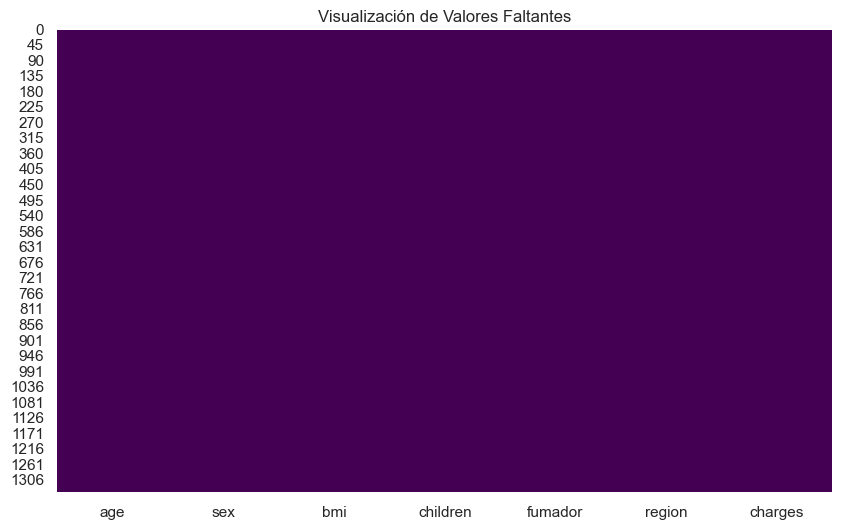

In [15]:
# Visualización de los valores faltantes con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Valores Faltantes')
plt.show()


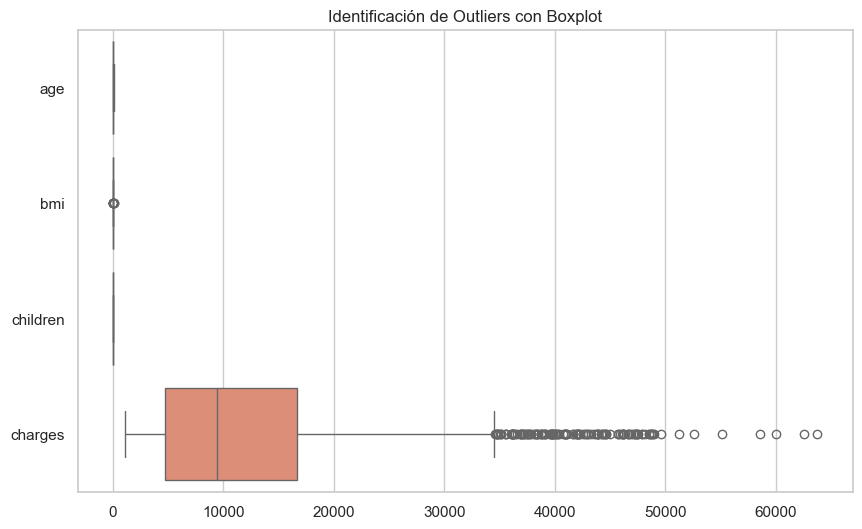

In [16]:
# Visualización de outliers con un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numerical, orient='h', palette='coolwarm')
plt.title('Identificación de Outliers con Boxplot')
plt.show()


In [17]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
age,1337,0,0.0
sex,1337,0,0.0
bmi,1337,0,0.0
children,1337,0,0.0
fumador,1337,0,0.0
region,1337,0,0.0
charges,1337,0,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   fumador   1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [19]:
# Ejemplo: asegurarse de que numerical_df contiene solo columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando el IQR para identificar outliers
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

# Mostrar los outliers detectados
outliers = ((numerical_df < outlier_lower_bound) | (numerical_df > outlier_upper_bound))

# Contar el número de outliers por columna
outliers_count = outliers.sum()
print("\nNúmero de outliers por columna:")
print(outliers_count)

# (Opcional) Mostrar los registros con outliers si es necesario
print("\nRegistros que contienen outliers:")
print(numerical_df[outliers.any(axis=1)])



Número de outliers por columna:
age           0
bmi           9
children      0
charges     139
dtype: int64

Registros que contienen outliers:
      age     bmi  children      charges
14     27  42.130         0  39611.75770
19     30  35.300         0  36837.46700
23     34  31.920         1  37701.87680
29     31  36.300         2  38711.00000
30     22  35.600         0  35585.57600
...   ...     ...       ...          ...
1301   62  30.875         3  46718.16325
1303   43  27.800         0  37829.72420
1313   19  34.700         2  36397.57600
1317   18  53.130         0   1163.46270
1323   42  40.370         2  43896.37630

[145 rows x 4 columns]


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   fumador   1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [21]:
# Identificar las columnas categóricas (tipo 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas Categóricas:", categorical_columns)


Columnas Categóricas: Index(['sex', 'fumador', 'region'], dtype='object')


In [22]:
# Cambiar el tipo de las columnas a 'category'
df['sex'] = df['sex'].astype('category')
df['fumador'] = df['fumador'].astype('category')
df['region'] = df['region'].astype('category')

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


**Preprocesamiento de Datos:**

* Imputar valores faltantes utilizando técnicas adecuadas (media, mediana, moda, imputación avanzada).
* Codificar variables categóricas utilizando One-Hot Encoding.
* Escalar características numéricas utilizando StandardScaler.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   fumador   1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.6 KB


In [31]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

 

# Separar las características y la variable objetivo
X = df.drop('charges', axis=1)
y = df['charges']

# Paso 1: Definir los preprocesadores para cada tipo de variable
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'fumador', 'region']

# Imputación de valores faltantes
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media
    ('scaler', StandardScaler())  # Escalar características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

# Paso 2: Aplicar ColumnTransformer para manejar las columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Paso 3: Crear un pipeline con el preprocesamiento y un modelo (por ejemplo, regresión logística)
# Aquí no se aplica un modelo específico, ya que solo estamos preprocesando los datos
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline a los datos (sin el modelo final)
X_processed = pipeline.fit_transform(X)

# Verificar las transformaciones
print("Características transformadas (numéricas y categóricas):")
print(X_processed)


Características transformadas (numéricas y categóricas):
[[-1.44041773 -0.45315959 -0.90923416 ...  0.          0.
   1.        ]
 [-1.51164747  0.50942165 -0.07944162 ...  0.          1.
   0.        ]
 [-0.79935006  0.3831546   1.58014347 ...  0.          1.
   0.        ]
 ...
 [-1.51164747  1.01448983 -0.90923416 ...  0.          1.
   0.        ]
 [-1.29795825 -0.79752426 -0.90923416 ...  0.          0.
   1.        ]
 [ 1.55123139 -0.26129928 -0.90923416 ...  1.          0.
   0.        ]]


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# 1. Separar las características y la variable objetivo
X = df.drop('charges', axis=1)
y = df['charges']

# 2. Preprocesamiento (ya realizado previamente en el pipeline)
# (Asumimos que ya tienes el 'X_processed' tras el preprocesamiento)

# 3. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 4. Definir los modelos de regresión
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# 5. Evaluación con validación cruzada para cada modelo
for model_name, model in models.items():
    # 5.1 Validación cruzada para evaluar el rendimiento
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(f'{model_name} - Mean Squared Error (MSE) with CV: {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
    
    # 5.2 Ajustar el modelo al conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # 5.3 Evaluar en el conjunto de prueba
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)  # Calcular el MSE en el conjunto de prueba
    print(f'{model_name} - Mean Squared Error on Test Set: {test_mse:.4f}\n')


Linear Regression - Mean Squared Error (MSE) with CV: 37531238.3162 ± 4895266.1211
Linear Regression - Mean Squared Error on Test Set: 35478020.6752

K-Nearest Neighbors - Mean Squared Error (MSE) with CV: 38246639.4397 ± 6252268.9172
K-Nearest Neighbors - Mean Squared Error on Test Set: 39915485.3985

Decision Tree - Mean Squared Error (MSE) with CV: 44296080.8587 ± 6139896.6556
Decision Tree - Mean Squared Error on Test Set: 39384596.0352



**Optimización de Hiperparámetros:**
* Implementar GridSearchCV para optimizar los hiperparámetros de los modelos seleccionados.
* Implementar RandomizedSearchCV como método alternativo de optimización.
* Comparar los resultados de GridSearchCV y RandomizedSearchCV para los modelos optimizados.

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
import numpy as np

# Definir los rangos de hiperparámetros para GridSearchCV y RandomizedSearchCV
param_grid = {
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]  # Eliminar 'auto'
    }
}

param_dist = {
    'K-Nearest Neighbors': {
        'n_neighbors': randint(3, 20),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None]  # Eliminar 'auto'
    }
}

# Crear los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Implementar GridSearchCV y RandomizedSearchCV
results = {}
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")

    # GridSearchCV
    if model_name != 'Linear Regression':  # No usar GridSearchCV para LinearRegression
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_grid_model = grid_search.best_estimator_
        grid_best_mse = mean_squared_error(y_test, best_grid_model.predict(X_test))
    else:
        grid_best_mse = np.nan  # Linear Regression no tiene parámetros para optimizar

    # RandomizedSearchCV
    if model_name != 'Linear Regression':  # No usar RandomizedSearchCV para LinearRegression
        random_search = RandomizedSearchCV(model, param_dist[model_name], n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        best_random_model = random_search.best_estimator_
        random_best_mse = mean_squared_error(y_test, best_random_model.predict(X_test))
    else:
        random_best_mse = np.nan  # Linear Regression no tiene parámetros para optimizar

    # Guardar los resultados
    results[model_name] = {
        'GridSearch Best Params': grid_search.best_params_ if model_name != 'Linear Regression' else 'N/A',
        'GridSearch MSE': grid_best_mse,
        'RandomSearch Best Params': random_search.best_params_ if model_name != 'Linear Regression' else 'N/A',
        'RandomSearch MSE': random_best_mse
    }

# Imprimir los resultados
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print(f"GridSearch Best Parameters: {result['GridSearch Best Params']}")
    print(f"GridSearch MSE on Test Set: {result['GridSearch MSE']:.4f}" if not np.isnan(result['GridSearch MSE']) else 'No optimization')
    print(f"RandomSearch Best Parameters: {result['RandomSearch Best Params']}")
    print(f"RandomSearch MSE on Test Set: {result['RandomSearch MSE']:.4f}" if not np.isnan(result['RandomSearch MSE']) else 'No optimization')


Optimizing Linear Regression...
Optimizing K-Nearest Neighbors...
Optimizing Decision Tree...

Linear Regression:
GridSearch Best Parameters: N/A
No optimization
RandomSearch Best Parameters: N/A
No optimization

K-Nearest Neighbors:
GridSearch Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
GridSearch MSE on Test Set: 35359564.5081
RandomSearch Best Parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
RandomSearch MSE on Test Set: 34777845.8569

Decision Tree:
GridSearch Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
GridSearch MSE on Test Set: 25299413.4747
RandomSearch Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 9}
RandomSearch MSE on Test Set: 20344883.5535


**Evaluación de Modelos:**

* Evaluar los modelos optimizados utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Generar y analizar la matriz de confusión para los modelos optimizados.
* Crear y visualizar la curva ROC para evaluar la capacidad del modelo para distinguir entre clases.

Evaluating Linear Regression...


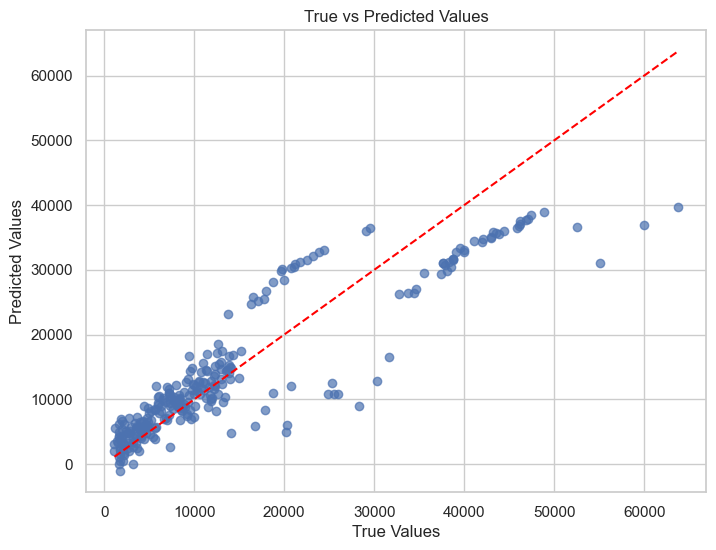

MSE: 35478020.6752
RMSE: 5956.3429
R²: 0.8069


In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Función para evaluar los modelos (ajustada para regresión)
def evaluate_model(model_name, model, X_test, y_test):
    # Ajustar el modelo si no está ajustado
    if model_name == 'Linear Regression' and not hasattr(model, 'coef_'):
        model.fit(X_train, y_train)  # Ajustar el modelo si no está ajustado aún
    
    # Hacer predicciones
    y_pred = model.predict(X_test)

    # Métricas para regresión
    mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio
    rmse = mse ** 0.5  # Raíz del error cuadrático medio
    r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación R^2

    # Visualización de los resultados
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values')
    plt.show()

    return mse, rmse, r2

# Evaluar Linear Regression
if 'Linear Regression' in models:
    print(f"Evaluating Linear Regression...")
    mse, rmse, r2 = evaluate_model('Linear Regression', models['Linear Regression'], X_test, y_test)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")


para commit